In [1]:
 %matplotlib notebook

import os
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

csv_2016 = "2016.csv"
csv_2017 = "2017.csv"
csv_2018 = "2018.csv"

df_2016 = pd.read_csv(csv_2016)
df_2017 = pd.read_csv(csv_2017)
df_2018 = pd.read_csv(csv_2018, encoding="ISO-8859-1")

frames = [df_2016, df_2017, df_2018]
years_raw = pd.concat(frames)

years_raw_reduced = years_raw.loc[:,['CALLERTYPE', 'DATEINVTDONE', 'DATETIMECLOSED',
       'DATETIMEINIT', 'DESCRIPTION', 'NEIGHBORHOOD',
       'PROBADDRESS', 'REQUESTID', 'STATUS', 'SUBMITTO', 'WARD']]

years = years_raw_reduced.rename(index=str, columns={"CALLERTYPE": "Comm Type", "DATEINVTDONE": "Date Done",
                                       "DATETIMECLOSED":"Date Closed", "DATETIMEINIT":"Date Requested",
                                       "DESCRIPTION":"Request Type", "NEIGHBORHOOD":"Neighborhood", 
                                       "PROBADDRESS":"Address", "REQUESTID":"Request ID",
                                       "STATUS":"Status", "SUBMITTO":"Department", "WARD":"Ward"})

C:\ProgramData\Miniconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Miniconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (6,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
years2 = years.dropna("index", how="any", subset=['Ward'])
years2.head()

,Comm Type,Date Done,Date Closed,Date Requested,Request Type,Neighborhood,Address,Request ID,Status,Department,Ward
0,PHONE,2016-01-01 01:35:00.0,2016-01-01 01:44:44.76,2016-01-01 00:06:09.173,Signal Dark,36,LOCUST BLVD & N JEFFERSON AVE,803600,CLOSED,"TRAFFIC DIVISION, 511",06
1,PHONE,2016-01-01 00:00:00.0,2016-01-01 05:59:16.903,2016-01-01 01:21:18.37,Whole block lights out,69,4900 ANDERSON AVE,803601,CLOSED,"TRAFFIC DIVISION, 511",01
3,PHONE,2016-01-04 00:00:00.0,2016-01-05 17:55:46.617,2016-01-01 01:39:20.727,Whole block lights out,55,4900 WABADA AVE,803603,CLOSED,"TRAFFIC DIVISION, 511",01
6,WEB,2016-01-08 09:08:29.417,2016-01-08 09:08:47.137,2016-01-01 10:19:34.0,Hole-bottom of cont,46,5941 LINDELL BLVD,803606,CLOSED,"REFUSE,",28
7,WEB,2016-01-04 15:45:13.69,2016-01-04 15:45:15.98,2016-01-01 11:33:28.0,Dead Animal,25,GRAVOIS RD & POTOMAC ST,803607,CLOSED,"REFUSE,",15


In [3]:
years3 = years2[(years2.Ward != 'a') & (years2.Ward != '20 & 9') &
                (years2.Ward != '7 & 6') & (years2.Ward != '9 & 20') &
                (years2.Ward != '6 & 7') & (years2.Ward != '9 & 7') &
                (years2.Ward != '11 or 12') & (years2.Ward != '16,10,23') &
                (years2.Ward != '13 & 11') & (years2.Ward != '7 & 9')]

wards = years3.groupby(years3.Ward.astype(float).astype(int))
requests = wards["Request ID"].count()
ward_request = pd.DataFrame({"Total":requests})

ward_request

,Total
Ward,
1,12343
2,14182
3,14532
4,13731
5,8466
6,12299
7,16440
8,10800
9,14391


<IPython.core.display.Javascript object>


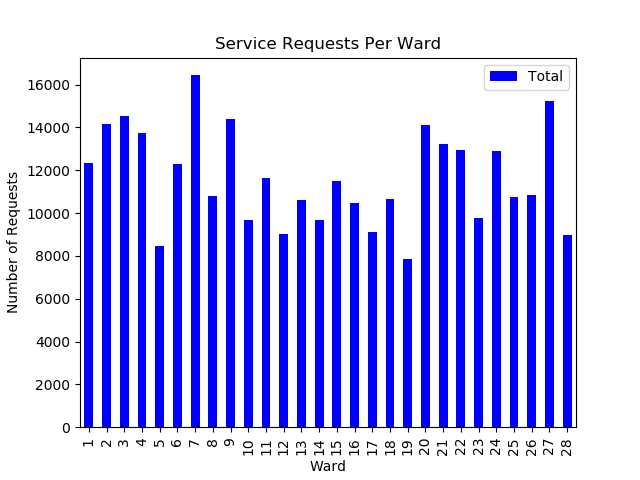

Text(0.5, 0, 'Ward')

In [28]:
plt.figure()
ward_request.plot(kind="bar", facecolor="b")
plt.title("Service Requests Per Ward")
plt.ylabel("Number of Requests")
plt.xlabel("Ward")

In [7]:
potholes_2016 = years3[(years3["Date Requested"].str.contains("2016") == True) & (years3["Request Type"].str.contains("Pothole") == True)]
potholes_2017 = years3[(years3["Date Requested"].str.contains("2017") == True) & (years3["Request Type"].str.contains("Pothole") == True)]
potholes_2018 = years3[(years3["Date Requested"].str.contains("2018") == True) & (years3["Request Type"].str.contains("Pothole") == True)]

count_2016 = potholes_2016["Request Type"].value_counts()
count_2017 = potholes_2017["Request Type"].value_counts()
count_2018 = potholes_2018["Request Type"].value_counts()

types_2016 = potholes_2016["Request Type"].unique()
types_2017 = potholes_2017["Request Type"].unique()
types_2018 = potholes_2018["Request Type"].unique()


,Comm Type,Date Done,Date Closed,Date Requested,Request Type,Neighborhood,Address,Request ID,Status,Department,Ward
205,PHONE,2018-01-18 06:21:00.0,2018-01-19 05:56:27.33,2018-01-02 13:59:15.307,Potholes - Residnl,76,6014 W FLORISSANT AVE,1049511,CLOSED,"STREET DIVISION, 514",27
390,OTHER,2018-01-09 06:13:29.933,2018-01-09 06:13:29.933,2018-01-03 09:13:32.843,Potholes - Major St,36,S 22ND ST & MARKET ST,1049704,CLOSED,"STREET DIVISION, 514",06
470,OTHER,2018-01-10 06:06:29.95,2018-01-10 06:06:29.95,2018-01-03 11:00:15.77,Potholes - Residnl,77,3851 WASHINGTON AVE,1049794,CLOSED,"STREET DIVISION, 514",19
477,OTHER,2018-01-10 06:00:01.96,2018-01-10 06:00:01.96,2018-01-03 11:11:10.543,Potholes - Residnl,77,ENRIGHT AVE & N SPRING AVE,1049806,CLOSED,"STREET DIVISION, 514",19
486,WEB,2018-01-10 13:10:41.897,2018-01-10 13:10:41.897,2018-01-03 11:31:44.0,Potholes - Residnl,9,6551 LINDENWOOD AVE,1049816,CLOSED,"STREET DIVISION, 514",23
604,NaN,2018-01-10 13:08:39.727,2018-01-10 13:08:39.727,2018-01-03 15:26:26.637,Potholes - Major St,15,3709 CHIPPEWA ST,1049946,CLOSED,"STREET DIVISION, 514",15
607,NaN,2018-01-10 13:09:09.33,2018-01-10 13:09:09.33,2018-01-03 15:29:31.33,Potholes - Major St,24,2001 S JEFFERSON AVE,1049949,CLOSED,"STREET DIVISION, 514",06
632,NaN,2018-01-10 13:10:10.853,2018-01-10 13:10:10.853,2018-01-03 16:00:45.82,Potholes - Residnl,27,4253 MAGNOLIA AVE,1049974,CLOSED,"STREET DIVISION, 514",08
741,NaN,2018-01-11 06:14:47.31,2018-01-11 06:14:47.31,2018-01-04 08:55:20.77,Potholes - Residnl,13,4501 TOWER GROVE PL,1050095,CLOSED,"STREET DIVISION, 514",08
1087,OTHER,2018-01-11 06:09:29.233,2018-01-11 06:09:29.233,2018-01-05 09:04:24.74,Potholes - Residnl,31,3536 VISTA AVE,1050458,CLOSED,"STREET DIVISION, 514",19


<IPython.core.display.Javascript object>


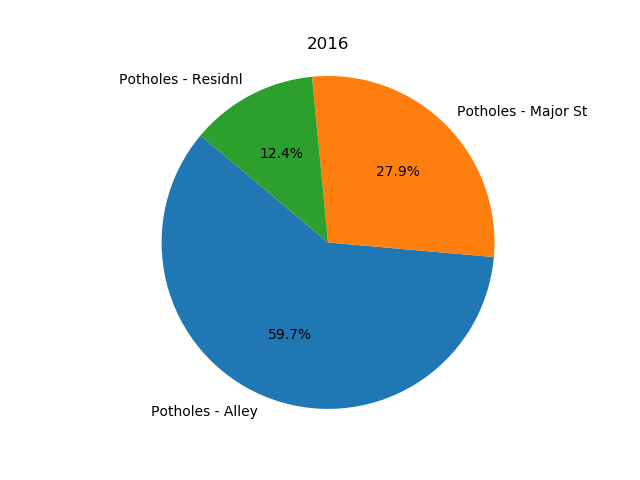

(-1.1104574269956102,
 1.1099642747117449,
 -1.1099549264745647,
 1.110417082834993)

In [32]:
plt.figure()
plt.pie(count_2016, labels=types_2016, autopct="%1.1f%%", shadow=False, startangle=140)
plt.title("Pothole Request in 2016")
plt.axis("equal")

<IPython.core.display.Javascript object>


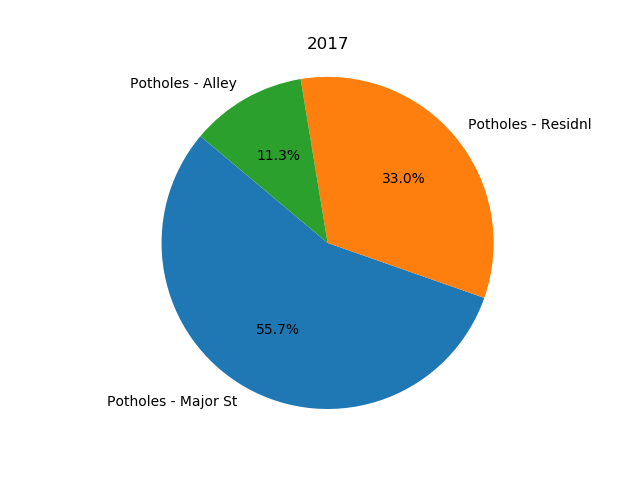

(-1.1114125349203618,
 1.1161649588544935,
 -1.1096753137120612,
 1.1160814025558594)

In [33]:
plt.figure()
plt.pie(count_2017, labels=types_2017, autopct="%1.1f%%", shadow=False, startangle=140)
plt.title("Pothole Request in 2017")
plt.axis("equal")

<IPython.core.display.Javascript object>


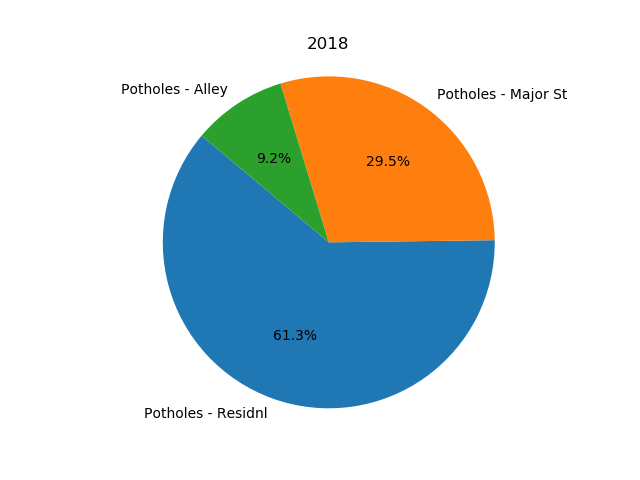

(-1.111968710030192,
 1.1026805594080225,
 -1.1139327839944664,
 1.113085422085674)

In [34]:
plt.figure()
plt.pie(count_2018, labels=types_2018, autopct="%1.1f%%", shadow=False, startangle=140)
plt.title("Pothole Request in 2018")
plt.axis("equal")